In [1]:
#### Financial Planning with APIs and Simulations

"""

In this Project, We will design an APP to help investors who have different level of risk-aversion level to select the portfolio. 

Also, we will present the portfolio holdings and simulated investment returns by Monte Carlo simulation

Part 1: Calculate the returns for 5 portfolios

Part 2: Design the CLI

Part 3: Design the APP

"""

'\n\nIn this Project, We will design an APP to help investors who have different level of risk-aversion level to select the portfolio. \n\nAlso, we will present the portfolio holdings and simulated investment returns by Monte Carlo simulation\n\nPart 1: Calculate the returns for 5 portfolios\n\nPart 2: Design the CLI\n\nPart 3: Design the APP\n\n'

In [2]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline



In [3]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [4]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imprted correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

In [5]:
# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [6]:
# Set the tickers for both the bond and stock portion of the portfolio

tickers = ["SPY", "AGG"]

timeframe = "1D"

start_date = pd.Timestamp("2019-01-02", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-31", tz = "America/New_York").isoformat()

In [7]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data

prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

In [8]:
# Display both the first and last five rows of the DataFrame

display(prices_df.head())
display(prices_df.tail())

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970  2999623   
2021-06-15 00:00:00-04:00  114.90  115.0200  114.8700  114.995  5842592   
2021-06-16 00:00:00-04:00  115.07  115.1285  114.5100  114.630  7527672   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-06-10 00:00:00-04:00  422.96  424.63  421.55  423.58  43577329  
2021-06-11 00:00:00-04:00  424.19  424.42  422.82  424.31  37018077  
2021-06-14 00:00:00-04:00  424.43  425.29  423.10  425.29  33128340  
2021-06-15 00:00:00-04:00  425.43  425.46  423.54  424.50  42885806  
2021-06-16 00:00:00-04:00  424.63  424.87  419.92  422.12  73638324

AGG                                        SPY  \
                             open     high      low   close   volume    open   
time                                                                           
2021-10-25 00:00:00-04:00  114.06  114.270  114.060  114.17  7088133  454.28   
2021-10-26 00:00:00-04:00  114.25  114.380  114.110  114.37  5284755  457.20   
2021-10-27 00:00:00-04:00  114.66  114.915  114.425  114.77  6817074  456.45   
2021-10-28 00:00:00-04:00  114.71  114.825  114.570  114.65  4971007  455.46   
2021-10-29 00:00:00-04:00  114.35  114.780  114.350  114.62  7051614  455.87   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-25 00:00:00-04:00  455.90  452.39  455.48  37918548  
2021-10-26 00:00:00-04:00  458.49  455.56  455.97  49865704  
2021-10-27 00:00:00-04:00  457.16  453.86  453.92  48219255  
2021-10-28 00:00:00-04:00  458.40  455.45  458.27  43081788  
2021-10-29 00:00:00-04:00  459.56  455.56  459.22  58813207

In [9]:
# Configure the Monte Carlo simulation to forecast 3 years cumulative returns
# The weights should be split 80% to AGG and 20% to SPY.
# Run 500 samples.

MC_8020_weight = MCSimulation(
  portfolio_data = prices_df,
  weights = [.80, .20],
  num_simulation = 500,
  num_trading_days = 252*3
)

# Review the simulation input data

MC_8020_weight.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970  2999623   
2021-06-15 00:00:00-04:00  114.90  115.0200  114.8700  114.995  5842592   
2021-06-16 00:00:00-04:00  115.07  115.1285  114.5100  114.630  7527672   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2021-06-10 00:00:00-04:00          NaN  422.96  424.63  421.55  423.58   
2021-06-11 00:00:00-04:00    -0.000520  424.19  424.42  422.82  424.31   
2021-06-14 00:00:00-04:00    -0.002343  424.43  425.29  423.10  425.29   
2021-06-15 00:00:00-04:00     0.000217  425.43  425.46  423.54  424.50   
2021-06-16 00:00:00-04:00    -0.003174  424.63  424.87  419.92  422.12   

                                                  
                             volume daily_return  
time                                              
2021-06-10 00:00:00-04:00  43577329          NaN  
2021-06-11 00:00:00-04:00  37018077     0.001723  
2021-06-14 00:00:00-04:00  33128340     0.002310  
2021-06-15 00:00:00-04:00  42885806    -0.001858  
2021-06-16 00:00:00-04:00  73638324    -0.005607

In [10]:
# Run the Monte Carlo simulation to forecast 3 years cumulative returns

MC_8020_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001798,1.001522,0.998846,0.997590,1.001767,1.000787,1.002702,1.000212,1.000647,0.998489,...,1.000316,0.999902,1.000811,0.998657,1.002168,0.999630,0.999204,1.003881,0.998244,1.000083
2,1.003793,1.001594,0.996945,0.999694,1.000589,0.997301,1.003820,1.002839,1.000667,0.999555,...,1.001310,0.996603,1.001154,0.998824,1.005100,1.001440,0.999563,1.003876,0.998475,0.996835
3,1.001783,1.001028,0.997588,0.997593,0.999431,0.995691,1.002804,0.999068,1.003921,0.995594,...,1.000571,0.995581,1.001466,0.999386,1.004123,1.000073,0.999134,1.004475,0.995996,0.997332
4,1.000478,0.997253,0.996123,0.996119,0.999394,0.994940,1.004917,0.999855,1.004123,0.998940,...,0.998422,0.995493,1.001590,1.001465,1.004982,1.001442,0.998561,1.005864,0.997029,0.997666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.115414,1.128974,1.152387,1.138048,1.190731,1.086289,1.165079,1.121261,1.074436,1.148258,...,1.095090,1.039289,1.140356,1.079325,1.027225,1.158277,1.013842,1.064323,1.085806,1.199510
753,1.117695,1.129705,1.150176,1.143371,1.192873,1.085812,1.166797,1.122489,1.076322,1.149790,...,1.092749,1.041444,1.141579,1.082618,1.027879,1.162435,1.011998,1.066618,1.082722,1.199686
754,1.119240,1.132461,1.150287,1.145920,1.187202,1.083767,1.166839,1.119495,1.077400,1.150585,...,1.089744,1.038012,1.142357,1.080935,1.029697,1.165198,1.010794,1.069743,1.086387,1.203533
755,1.117438,1.132669,1.149390,1.144539,1.188589,1.083820,1.168084,1.117721,1.077188,1.149065,...,1.084693,1.035961,1.138881,1.075548,1.031067,1.168515,1.010474,1.067581,1.085135,1.205437


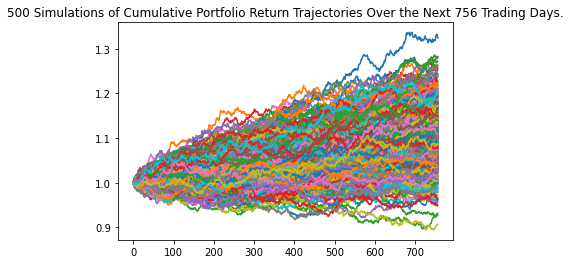

In [11]:
# Visualize the 3-year Monte Carlo simulation by creating an overlay line plot

MC_8020_weight_line_plot = MC_8020_weight.plot_simulation()

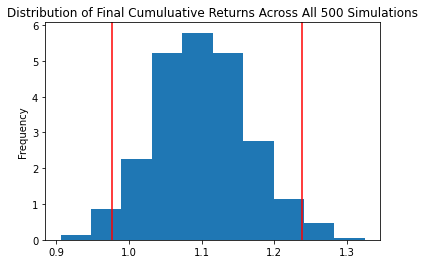

In [12]:
# Visualize the probability distribution of the 3-year Monte Carlo simulation by plotting a histogram

MC_8020_weight_distribution_plot = MC_8020_weight.plot_distribution()

In [13]:
# Generate summary statistics from the 3-year Monte Carlo simulation results save the results as a variable

MC_8020_weight_table = MC_8020_weight.summarize_cumulative_return()

# Review the 3-year Monte Carlo summary statistics

print (MC_8020_weight_table)

count           500.000000
mean              1.100882
std               0.065843
min               0.906361
25%               1.055886
50%               1.103284
75%               1.140903
max               1.324398
95% CI Lower      0.976454
95% CI Upper      1.237390
Name: 756, dtype: float64


In [14]:
# Compute summary statistics from the simulated daily returns

simulated_returns_data = {
    "mean": list(MC_8020_weight.simulated_return.mean(axis=1)),
    "median": list(MC_8020_weight.simulated_return.median(axis=1)),
    "min": list(MC_8020_weight.simulated_return.min(axis=1)),
    "max": list(MC_8020_weight.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()


,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000179,1.000308,0.994253,1.006995
2,1.000166,1.000311,0.992540,1.009617
3,1.000238,1.000188,0.988684,1.011959
4,1.000333,1.000384,0.988518,1.013049


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of 80/20 portfolio Over the Next 3 Years'}>

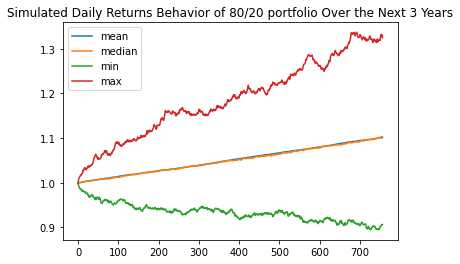

In [15]:
# Use the `plot` function to visually analyze the trajectory of 80/20 portfolio returns on the next 3 years of trading days simulation

df_simulated_returns.plot(title="Simulated Daily Returns Behavior of 80/20 portfolio Over the Next 3 Years")

In [16]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

#Suppose the initial investment is $10000, and the 30yr US treasury bill yield is 2% (risk-free-rate)

initial_investment = 10000

ci_lower_three_cumulative_return = MC_8020_weight_table[8] * initial_investment
ci_upper_three_cumulative_return = MC_8020_weight_table[9] * initial_investment

risk_free_rate = 0.02

sharpe_ratio = (MC_8020_weight_table[1] - risk_free_rate) / MC_8020_weight_table[2]


# Print the statistics of the portfolio

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the stock and bond portion of portfolio"
      f" with a 80/20 weight portfolio over the next 3 years will end within in the range of"
      f" ${ci_lower_three_cumulative_return: .2f} and ${ci_upper_three_cumulative_return: .2f}."
      f"The Sharpe ratio of the simulated 80/20 weight portfolio is {sharpe_ratio: .2f}")

There is a 95% chance that an initial investment of $10000 in the stock and bond portion of portfolio with a 80/20 weight portfolio over the next 3 years will end within in the range of $ 9764.54 and $ 12373.90.The Sharpe ratio of the simulated 80/20 weight portfolio is  16.42


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of 80/20 Portfolio Over the Next 3 Years'}>

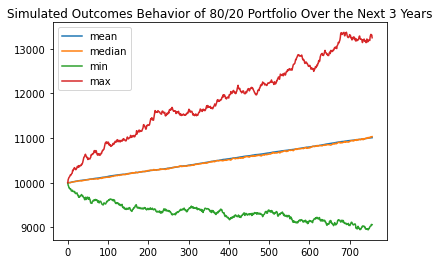

In [17]:
# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Use the 'plot' function to create a chart of the simulated profits/losses

cumulative_pnl.plot(title="Simulated Outcomes Behavior of 80/20 Portfolio Over the Next 3 Years")

In [18]:
# Visualize Portfolio allocation

portfolio_allocation =  [.80, .20]

portfolio_df = pd.DataFrame(
    {"amount": [portfolio_allocation[0], portfolio_allocation[1]]},
    index = ["AGG", "SPY"]
)

<AxesSubplot:title={'center':'The Money Growth Portfolio Composition: 80% Bond and 20% Stock'}, ylabel='amount'>

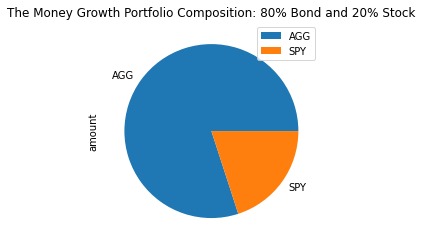

In [19]:
# Plot the 80/20 portfolio (stock and bond) in a pie chart

portfolio_df.plot(
    kind = "pie",
    y='amount', 
    title="The Money Growth Portfolio Composition: 80% Bond and 20% Stock"
)